# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create base url, list to add cities to, and create a city counter so I can print the "city number" later
print("Compiling weather data")
print("---------------------------------------------------------")
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_data_list=[]
city_number=0 #this will be my dataframe index, so, start at 0
for i, city in enumerate(cities):
    #create unique url per city
    city_url= f"{url}&q={city}"
    #print progress as you go
    print(f"Processing Record No. {city_number}: {city}")
    print("---------------------------------------------------------")
    #add one to the counter
    city_number=city_number+1
    #send request to open weather api for each city
    #try/except so it will skip if it doesn't find the data instead of failing
    try:
        city_weather=requests.get(city_url).json()
        #record each item needed for each city
        lat_city= city_weather["coord"]["lat"]
        lng_city= city_weather["coord"]["lon"]
        temp=city_weather["main"]["temp_max"]
        hum= city_weather["main"]["humidity"]
        clouds=city_weather["clouds"]["all"]
        wind= city_weather["wind"]["speed"]
        country=city_weather["sys"]["country"]
        date=city_weather["dt"]
        
        #add info to "city_data_list" in the order I'll want my dataframe
        city_data_list.append({"City":city,
                              "Country":country,
                              "Lat.":lat_city,
                              "Long.":lng_city,
                               "Temperature":temp,
                               "Humidity":hum,
                               "Cloudiness":clouds,
                               "Wind Speed":wind,
                               "Date":date
                              })
        time.sleep(1) #delay to avoid running too many requests per minute.
        #here's where we skip, if data not available
    except:
        print("Data for a city is incomplete. Continuing to next record.")
        print("---------------------------------------------------------")
        time.sleep(1)
        pass
    #log that the data is done loading
print("Done processing all data.")
print("---------------------------------------------------------")

Compiling weather data
---------------------------------------------------------
Processing Record No. 0: narsaq
---------------------------------------------------------
Processing Record No. 1: busselton
---------------------------------------------------------
Processing Record No. 2: kruisfontein
---------------------------------------------------------
Processing Record No. 3: marcona
---------------------------------------------------------
Data for a city is incomplete. Continuing to next record.
---------------------------------------------------------
Processing Record No. 4: flin flon
---------------------------------------------------------
Processing Record No. 5: port alfred
---------------------------------------------------------
Processing Record No. 6: olafsvik
---------------------------------------------------------
Processing Record No. 7: athmallik
---------------------------------------------------------
Processing Record No. 8: zhigansk
--------------------------

Processing Record No. 78: murgab
---------------------------------------------------------
Processing Record No. 79: kitimat
---------------------------------------------------------
Processing Record No. 80: barentsburg
---------------------------------------------------------
Data for a city is incomplete. Continuing to next record.
---------------------------------------------------------
Processing Record No. 81: tabiauea
---------------------------------------------------------
Data for a city is incomplete. Continuing to next record.
---------------------------------------------------------
Processing Record No. 82: chuy
---------------------------------------------------------
Processing Record No. 83: bluff
---------------------------------------------------------
Processing Record No. 84: bardiyah
---------------------------------------------------------
Processing Record No. 85: mataura
---------------------------------------------------------
Processing Record No. 86: shieli

Processing Record No. 152: plouzane
---------------------------------------------------------
Processing Record No. 153: dakar
---------------------------------------------------------
Processing Record No. 154: port augusta
---------------------------------------------------------
Processing Record No. 155: nome
---------------------------------------------------------
Processing Record No. 156: solnechnyy
---------------------------------------------------------
Processing Record No. 157: new norfolk
---------------------------------------------------------
Processing Record No. 158: lahat
---------------------------------------------------------
Processing Record No. 159: dudinka
---------------------------------------------------------
Processing Record No. 160: puerto ayora
---------------------------------------------------------
Processing Record No. 161: sarab
---------------------------------------------------------
Processing Record No. 162: tasiilaq
-------------------------

Processing Record No. 228: bubaque
---------------------------------------------------------
Processing Record No. 229: kautokeino
---------------------------------------------------------
Processing Record No. 230: ruidoso
---------------------------------------------------------
Processing Record No. 231: paucartambo
---------------------------------------------------------
Data for a city is incomplete. Continuing to next record.
---------------------------------------------------------
Processing Record No. 232: arkhara
---------------------------------------------------------
Processing Record No. 233: south berwick
---------------------------------------------------------
Processing Record No. 234: kamenskoye
---------------------------------------------------------
Data for a city is incomplete. Continuing to next record.
---------------------------------------------------------
Processing Record No. 235: eureka
---------------------------------------------------------
Processin

Processing Record No. 304: vaitupu
---------------------------------------------------------
Data for a city is incomplete. Continuing to next record.
---------------------------------------------------------
Processing Record No. 305: neenah
---------------------------------------------------------
Processing Record No. 306: hamilton
---------------------------------------------------------
Processing Record No. 307: mecca
---------------------------------------------------------
Processing Record No. 308: grand-lahou
---------------------------------------------------------
Processing Record No. 309: waingapu
---------------------------------------------------------
Processing Record No. 310: valparaiso
---------------------------------------------------------
Processing Record No. 311: iquitos
---------------------------------------------------------
Processing Record No. 312: sassandra
---------------------------------------------------------
Processing Record No. 313: aklavik
----

Processing Record No. 382: lucea
---------------------------------------------------------
Processing Record No. 383: samarai
---------------------------------------------------------
Processing Record No. 384: chagda
---------------------------------------------------------
Data for a city is incomplete. Continuing to next record.
---------------------------------------------------------
Processing Record No. 385: awbari
---------------------------------------------------------
Processing Record No. 386: toliary
---------------------------------------------------------
Data for a city is incomplete. Continuing to next record.
---------------------------------------------------------
Processing Record No. 387: kano
---------------------------------------------------------
Processing Record No. 388: koungou
---------------------------------------------------------
Processing Record No. 389: agustin codazzi
---------------------------------------------------------
Processing Record No. 3

Processing Record No. 465: clinton
---------------------------------------------------------
Processing Record No. 466: amazar
---------------------------------------------------------
Processing Record No. 467: adrar
---------------------------------------------------------
Processing Record No. 468: grindavik
---------------------------------------------------------
Processing Record No. 469: coquimbo
---------------------------------------------------------
Processing Record No. 470: gelsenkirchen
---------------------------------------------------------
Processing Record No. 471: wanxian
---------------------------------------------------------
Processing Record No. 472: tabas
---------------------------------------------------------
Processing Record No. 473: mombetsu
---------------------------------------------------------
Processing Record No. 474: inirida
---------------------------------------------------------
Processing Record No. 475: trairi
-------------------------------

Processing Record No. 544: san ramon de la nueva oran
---------------------------------------------------------
Processing Record No. 545: rio cauto
---------------------------------------------------------
Processing Record No. 546: synya
---------------------------------------------------------
Processing Record No. 547: panjab
---------------------------------------------------------
Processing Record No. 548: yinchuan
---------------------------------------------------------
Processing Record No. 549: sao joao da barra
---------------------------------------------------------
Processing Record No. 550: muscat
---------------------------------------------------------
Processing Record No. 551: jiaojiang
---------------------------------------------------------
Processing Record No. 552: tazovskiy
---------------------------------------------------------
Processing Record No. 553: necochea
---------------------------------------------------------
Processing Record No. 554: san borja


Processing Record No. 621: lebanon
---------------------------------------------------------
Processing Record No. 622: dingle
---------------------------------------------------------
Processing Record No. 623: acapulco
---------------------------------------------------------
Processing Record No. 624: dourbali
---------------------------------------------------------
Processing Record No. 625: chickasha
---------------------------------------------------------
Processing Record No. 626: salina
---------------------------------------------------------
Done processing all data.
---------------------------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data_df=pd.DataFrame(city_data_list)
city_data_df

,City,Country,Lat.,Long.,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,narsaq,GL,60.92,-46.05,57.20,44,33,8.05,1595201449
1,busselton,AU,-33.65,115.33,46.99,77,43,7.20,1595201333
2,kruisfontein,ZA,-34.00,24.73,53.24,39,0,6.08,1595201451
3,flin flon,CA,54.77,-101.86,73.40,38,20,4.70,1595201421
4,port alfred,ZA,-33.59,26.89,60.26,62,0,6.55,1595201452
...,...,...,...,...,...,...,...,...,...
559,dingle,PH,11.00,122.67,81.93,79,54,3.91,1595202167
560,acapulco,MX,16.86,-99.89,87.80,74,75,5.82,1595201920
561,dourbali,TD,11.81,15.86,72.90,83,89,17.02,1595202169
562,chickasha,US,35.05,-97.94,95.00,41,1,13.87,1595202170


In [11]:
city_data_df.to_csv(output_data_file, index_label="City_ID_No.")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [12]:
#set variables for relevant data from DF
lats=city_data_df["Lat."]
temps=city_data_df["Temperature"]
hums=city_data_df["Humidity"]
clouds2=city_data_df["Cloudiness"]
winds=city_data_df["Wind Speed"]

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Temperatures by Degrees Lat.')

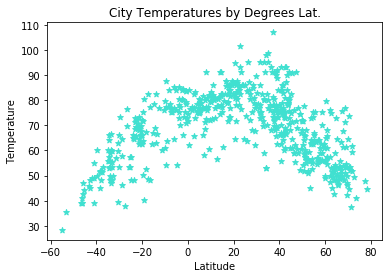

In [26]:
plt.scatter(lats,temps,c="turquoise",marker="*")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("City Temperatures by Degrees Lat.")

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Humidity Level by Degrees Lat.')

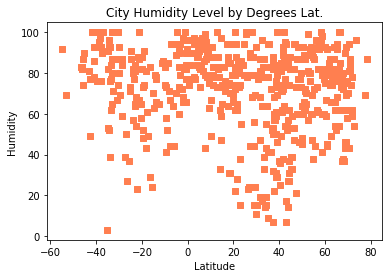

In [27]:
plt.scatter(lats,hums,c="coral",marker="s")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Humidity Level by Degrees Lat.")

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Cloudiness by Degrees Lat.')

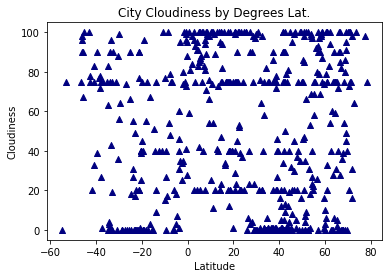

In [29]:
plt.scatter(lats,clouds2,c="navy",marker="^")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Cloudiness by Degrees Lat.")

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Wind Speed by Degrees Lat.')

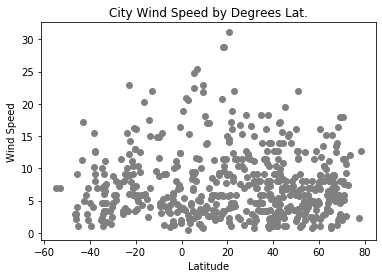

In [30]:
plt.scatter(lats,winds,c="grey",marker="o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Wind Speed by Degrees Lat.")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression